In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import scipy.stats
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import KFold
import random

# B - KNN Algorithm for Regression

## Load Dataset

In [2]:
data = pd.read_csv('weatherHistory.csv')
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


## Data Preparation

In [3]:
data = data[['Temperature (C)', 'Apparent Temperature (C)', 'Humidity']]
data.head()

,Temperature (C),Apparent Temperature (C),Humidity
0,9.472222,7.388889,0.89
1,9.355556,7.227778,0.86
2,9.377778,9.377778,0.89
3,8.288889,5.944444,0.83
4,8.755556,6.977778,0.83


In [4]:
data.shape

(96453, 3)

In [5]:
# select first 2000 items of dataset
df = data.iloc[0:2000]
df.shape

(2000, 3)

In [6]:
X = df[['Temperature (C)', 'Humidity']]
y = df[['Apparent Temperature (C)']]

## Visualize Data

In [22]:
def plot_data(data):
    plt.figure(figsize=(8, 6))
    ax = sns.scatterplot(data=data, x="Temperature (C)", y="Humidity", hue="Apparent Temperature (C)", palette='RdBu')
    norm = plt.Normalize(data['Apparent Temperature (C)'].min(), data['Apparent Temperature (C)'].max())
    sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
    sm.set_array([])

    # Remove the legend and add a colorbar
    ax.get_legend().remove()
    ax.figure.colorbar(sm)

    plt.show()

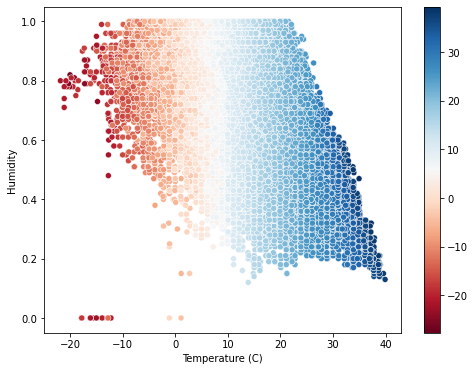

In [20]:
# Visualize all data
plot_data(data)

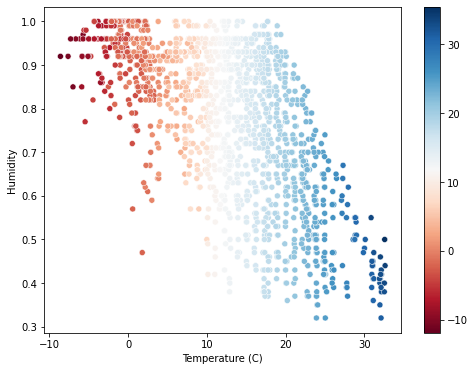

In [21]:
# Visualize first 2000 samples
plot_data(df)

## KNN Regression
from scratch

In [7]:
# Euclidean Distance
def distance(a, b):
    return np.sqrt(np.sum((a - b)**2, axis = 1))

In [82]:
def knn_model(X, y, new_sample, k):
    # calculate distances of the new point with all other points in dataset
    distances = distance(X, new_sample)

    # sort distance values and select the first(nearest) k points
    nearest_points_index = distances.argsort()[:k]
    nearest_points_values = [y.iloc[i] for i in nearest_points_index]
    
    # averaging values
    return np.array(nearest_points_values).mean()

### Using KNN for Dataset

#### With fixed K

In [90]:
k = 1
kf = KFold(n_splits=5, shuffle=True)
test_error = []

for train, test in kf.split(df):
    # split test/train sets
    X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
    
    # make predictions
    y_pred = []
    for _, x in X_test.iterrows():
        predict = knn_model(X_train, y_train, x, k)
        y_pred.append(predict)
        
    # calculate error
    test_error.append(mean_squared_error(y_test, y_pred))

print(test_error)

[1.5277793209876547, 1.169951466049383, 1.498449922839506, 1.272568827160494, 1.1917520061728397]


In [91]:
print('Average of MSE:', np.mean(test_error))
print('Standard Deviation:', np.std(test_error))

Average of MSE: 1.3321003086419754
Standard Deviation: 0.15198444687777302


#### With different K

In [111]:
K = [3, 5, 7, 10, 15]
kf = KFold(n_splits=5, shuffle=True)
average_mse = []
standard_deviation = []

for k in K:
    test_error = []
    for train, test in kf.split(df):
        # split test/train sets
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]

        # make predictions
        y_pred = []
        for _, x in X_test.iterrows():
            predict = knn_model(X_train, y_train, x, k)
            y_pred.append(predict)

        # calculate error
        test_error.append(mean_squared_error(y_test, y_pred))
    
    average_mse.append(np.mean(test_error))
    standard_deviation.append(np.std(test_error))
    
print(average_mse)
print(standard_deviation)

[0.8315256841563787, 0.829137162345679, 0.8325506238977074, 0.859754464506173, 0.8848274859396433]
[0.10390996747240633, 0.09049835716914284, 0.06296789767406154, 0.10754260161504081, 0.11200208668362159]


In [8]:
def plot_error_bar(labels, average_mse, standard_deviation, x_label):
    x_pos = np.arange(len(labels))

    # Build the plot
    fig, ax = plt.subplots()
    ax.bar(x_pos, average_mse,
           yerr=standard_deviation,
           align='center',
           alpha=0.5,
           ecolor='black',
           capsize=10)
    ax.set_ylabel('MSE')
    ax.set_xlabel(x_label)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(labels)
    ax.yaxis.grid(True)
    plt.show()

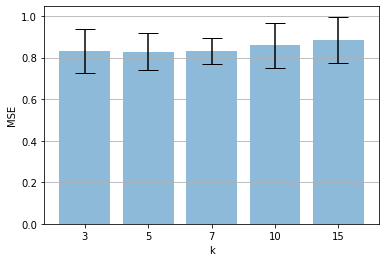

In [113]:
plot_error_bar(K, average_mse, standard_deviation, 'k')

## Weighted/Kernel KNN Regression
from scratch

In [14]:
def kernel_knn_model(X, y, new_sample, k, sigma):
    # calculate distances of the new point with all other points in dataset
    distances = distance(X, new_sample)

    # sort distance values and select the first(nearest) k points
    nearest_points_index = distances.argsort()[:k]
    nearest_points_distances = distances.sort_values()[:k]
    nearest_points_values = [y.iloc[i] for i in nearest_points_index]
    
    # predict the value using weighted formula
    predict = 0
    W = 0
    for i in range(k):
        # weights calculated using guassian function
#         w = random.gauss(nearest_points_distances.iloc[i], sigma)
        w = np.exp(-nearest_points_distances.iloc[i]/sigma)
        predict += (w * nearest_points_values[i])
        W += w
    predict /= W
    return predict

### Using Kernel KNN for Dataset

In [15]:
k = 5
sigma = [0.01, 0.04, 0.1, 0.4, 1, 4, 10, 40]
kf = KFold(n_splits=5, shuffle=True)
average_mse = []
standard_deviation = []

for sig in sigma:
    test_error = []
    for train, test in kf.split(df):
        # split test/train sets
        X_train, X_test, y_train, y_test = X.iloc[train], X.iloc[test], y.iloc[train], y.iloc[test]
        
        # make predictions
        y_pred = []
        for _, x in X_test.iterrows():
            predict = kernel_knn_model(X_train, y_train, x, k, sig)
            y_pred.append(predict)

        # calculate error
        test_error.append(mean_squared_error(y_test, y_pred))
    
    average_mse.append(np.mean(test_error))
    standard_deviation.append(np.std(test_error))
    
print(average_mse)
print(standard_deviation)

[0.9950836083620607, 0.8422210488011149, 0.81941889508173, 0.8152883953748915, 0.8312604064662221, 0.8626735967392699, 0.8232560451526346, 0.8178968299609973]
[0.048178465291010365, 0.08959584668141289, 0.05466845478344719, 0.10624035481527344, 0.04241965204756893, 0.1465597582188851, 0.07266627586021798, 0.16775492373969753]


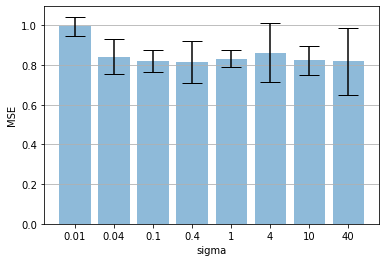

In [16]:
plot_error_bar(sigma, average_mse, standard_deviation, 'sigma')